In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Exercises for Thursday
***
# Exercise 1 : Decision trees

From the generator run you made, load the `decision_trees.csv` dataset and visualize it.

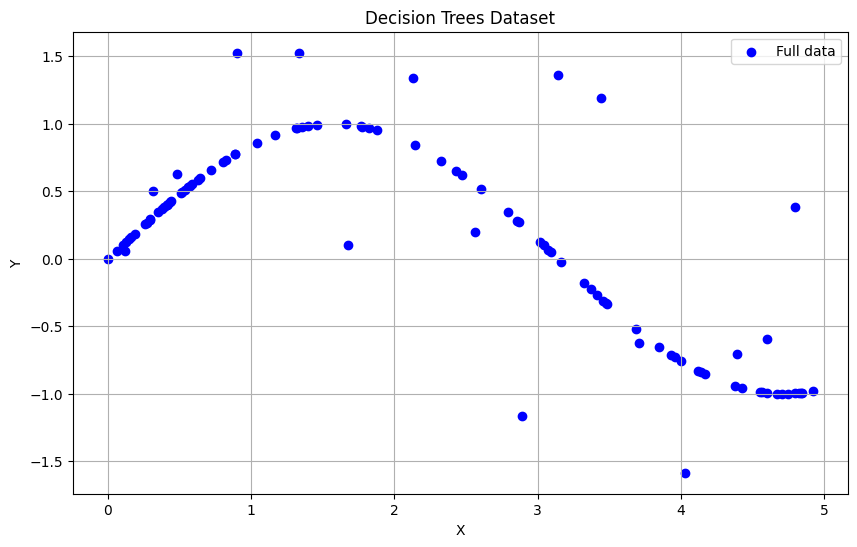

In [2]:
# Your code here
data = pd.read_csv('/Users/gaspardvilla/src/Nomades_ADA/data/week_3/decision_trees.csv')

# PLot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['y'], c='blue', marker='o', label='Full data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Trees Dataset')
plt.grid()
plt.legend()
plt.show()

Train and test a Decision Tree model (as a regression task) on this data set for a depth going from 2 to 5. \
What do you observe ? 

In [3]:
# Your code here
X_train, X_test, y_train, y_test = train_test_split(data[['x']], data['y'], test_size=0.2, random_state=42)

In [4]:
# Your code here
from sklearn.tree import DecisionTreeRegressor

regressors = []
for depth in range(2, 6):
    regressor = DecisionTreeRegressor(max_depth=depth)
    regressor.fit(X_train, y_train)
    regressors.append(regressor)

/opt/miniconda3/envs/ada/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/ada/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/ada/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/ada/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


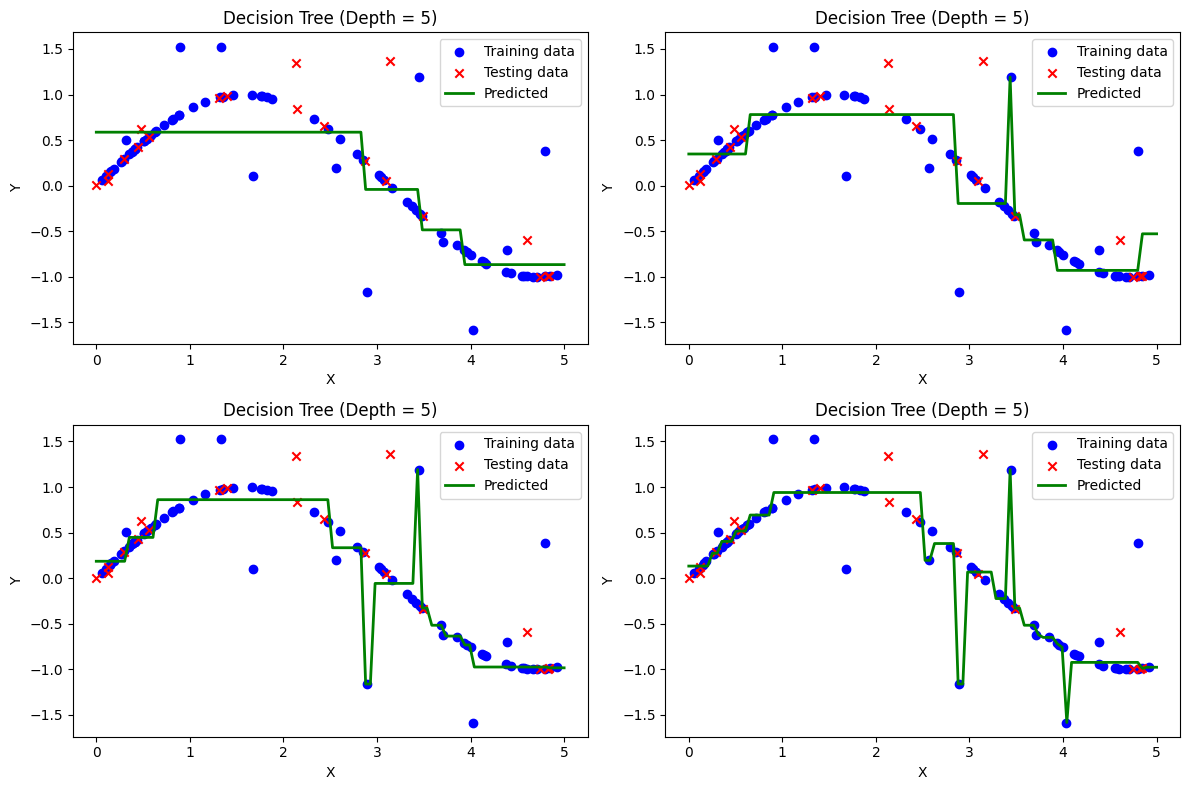

In [5]:
# Plot each regressor
xx = np.linspace(0, 5, 100)
plt.figure(figsize=(12, 8))

for idx, regressor in enumerate(regressors):
    plt.subplot(2, 2, idx + 1)
    plt.scatter(X_train, y_train, c='blue', marker='o', label='Training data')
    plt.scatter(X_test, y_test, c='red', marker='x', label='Testing data')
    plt.plot(xx, regressor.predict(xx.reshape(-1, 1)), color='green', linewidth=2, label='Predicted')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Decision Tree (Depth = {depth})')
    plt.legend()
plt.tight_layout()
plt.show()

***
# Exercise 2 : Random forest

Load the previous dataset from sklearn and train a Random Forest model on it.

In [32]:
# Your code here
from sklearn.ensemble import RandomForestRegressor

hyperparameters = {'n_estimators': [50, 50, 50, 100, 100, 100],
                   'max_depth': [2, 5, 10, 2, 5, 10]}

models = []
for n_estimators, max_depth in zip(hyperparameters['n_estimators'], hyperparameters['max_depth']):
    model = RandomForestRegressor(n_estimators = n_estimators,
                                  max_depth = max_depth,
                                  random_state = 42)
    model.fit(X_train, y_train)
    models.append(model)

/opt/miniconda3/envs/ada/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/ada/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/ada/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/ada/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/ada/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRe

<Figure size 1200x800 with 0 Axes>

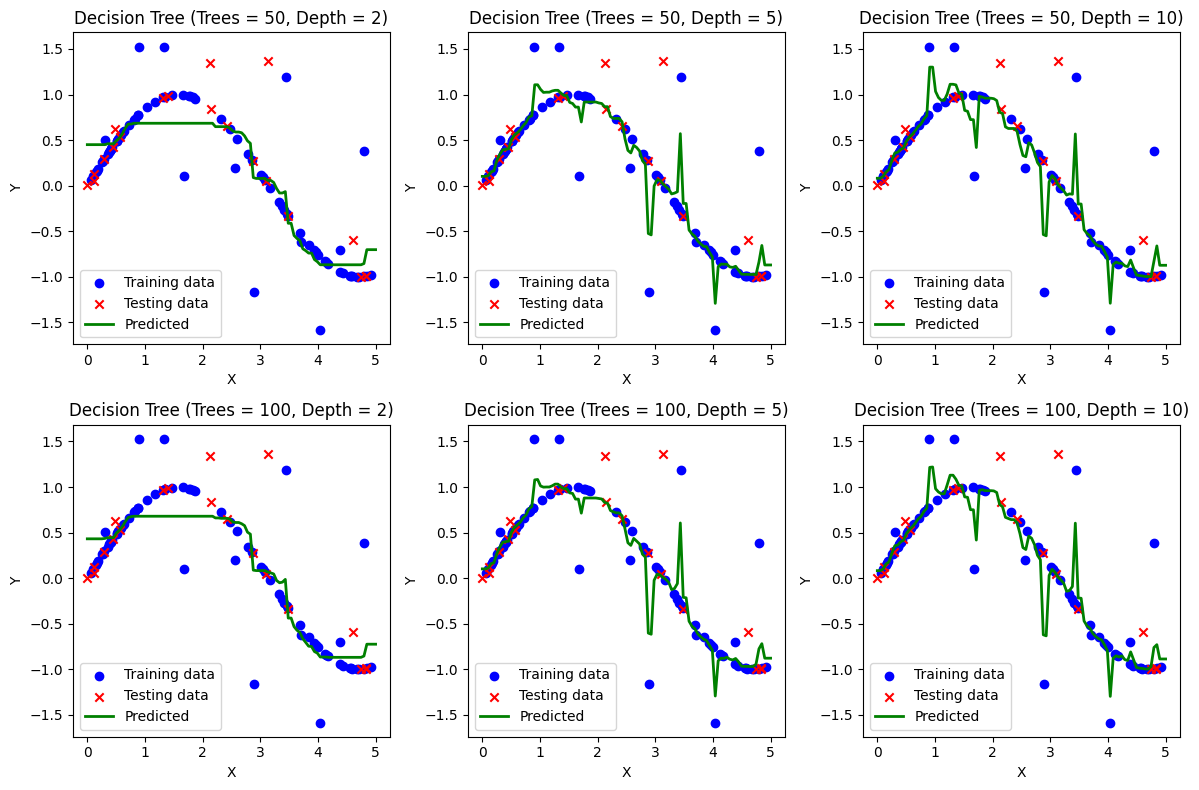

In [35]:
# Plot each regressor
xx = np.linspace(0, 5, 100)
plt.figure(figsize=(12, 8))
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for idx, regressor in enumerate(models):
    axs[idx // 3, idx % 3].scatter(X_train, y_train, c='blue', marker='o', label='Training data')
    axs[idx // 3, idx % 3].scatter(X_test, y_test, c='red', marker='x', label='Testing data')
    axs[idx // 3, idx % 3].plot(xx, regressor.predict(xx.reshape(-1, 1)), color='green', linewidth=2, label='Predicted')
    axs[idx // 3, idx % 3].set_xlabel('X')
    axs[idx // 3, idx % 3].set_ylabel('Y')
    axs[idx // 3, idx % 3].set_title(f'Decision Tree (Trees = {hyperparameters["n_estimators"][idx]}, Depth = {hyperparameters["max_depth"][idx]})')
    axs[idx // 3, idx % 3].legend()
plt.tight_layout()
plt.show()

***
# Exercise 3 : Random forest

Load the `load_diabetes` dataset from sklearn and train, validate and test a Random Forest model on it. \
Do not forget to validate your hyperparameters.

In [7]:
# Your code here
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the dataset into training, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)